In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [2]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'FB'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,166.119995,161.240005,161.500000,165.440002,20211500,165.440002
2019-03-21,166.389999,163.750000,164.889999,166.080002,16223000,166.080002
2019-03-22,167.419998,164.089996,165.649994,164.339996,16389200,164.339996
2019-03-25,166.539993,162.000000,163.000000,166.289993,12631200,166.289993
2019-03-26,169.449997,166.350006,167.350006,167.679993,15437900,167.679993


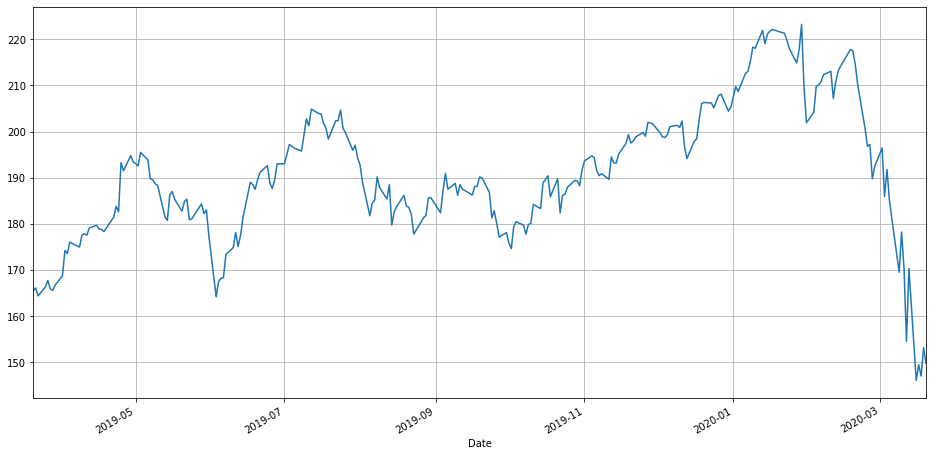

In [4]:
%matplotlib inline 
fig = plt.figure(figsize = (16,8))
data.Close.plot()
plt.grid()

In [5]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    Cr = pd.Series(df['Close'].shift(1), name = 'Cr')
    df = df.join(Cr)
    ROCr = pd.Series(ROC.shift(1), name = 'ROC_' + str(n) + '_r')
    df = df.join(ROCr)
    df['Recomendación'] = '-'
    
    df.loc[((ROC > 0) & (ROCr < 0)), 'Recomendación'] = 'Se recomienda COMPRAR la acción.'
    df.loc[((ROC < 0) & (ROCr > 0)), 'Recomendación'] = 'Se recomienda VENDER la acción.'
    df.loc[((df['Close'] < Cr) & ((ROC > 0) & (ROCr < 0) & (ROC > ROCr))), 'Recomendación'] = 'Se recomienda COMPRAR la acción. (DIV)'
    df.loc[((df['Close'] > Cr) & ((ROC < 0) & (ROCr > 0) & (ROC < ROCr))), 'Recomendación'] = 'Se recomienda VENDER la acción. (DIV)'    
    
    return df

In [6]:
df2 = ROC(data, 10)

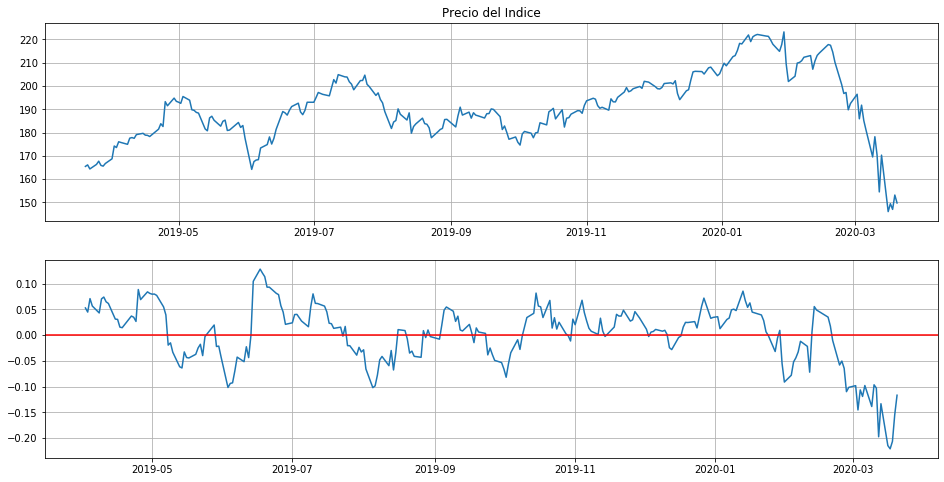

,Close,ROC_10,Recomendación
Date,,,
2019-05-08,189.539993,-0.019249,Se recomienda VENDER la acción.
2019-05-28,184.309998,0.019809,Se recomienda COMPRAR la acción.
2019-05-29,182.190002,-0.021904,Se recomienda VENDER la acción.
2019-07-23,202.360001,-0.001825,Se recomienda VENDER la acción. (DIV)
2019-07-24,204.660004,0.017045,Se recomienda COMPRAR la acción.
2019-07-25,200.710007,-0.020306,Se recomienda VENDER la acción.
2019-08-16,183.699997,0.010840,Se recomienda COMPRAR la acción.
2019-08-20,183.809998,-0.007237,Se recomienda VENDER la acción.
2019-08-27,181.300003,0.008848,Se recomienda COMPRAR la acción.


In [7]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_10)
plt.axhline(y=0, color= 'r')
plt.grid()
plt.show()
df2.loc[df2['Recomendación'] != '-',['Close', 'ROC_10', 'Recomendación']]
#df2[['Close', 'ROC_10', 'Recomendación']]